In [1]:
# coding=gbk
import os
os.chdir("..")
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
import pickle, datetime, copy
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import matplotlib.pyplot as plt
import pandas as pd
import utils, utils_eda, evaluator
from evaluator import Evaluator

# Configuration
PATH_ORI_DATA = r'C:\Users\lucid\Documents\长江实习\课题之自上而下\data'
## 原始数据文件是否已经更新
if_update = False
## 预处理逻辑(参数)变更/缓存的pickle需要更新时，设为False
####一定要注意利用的数据格式，避免用本月行情预测本月行情。
use_cache = True
if_cls = True
## 预处理参数
align_to = 'month'
use_lag_x = 15
begT = '2004-01'
endT = datetime.date.today()

X, y = utils.get_preproc_data(PATH_ORI_DATA, if_update, use_cache, use_lag_x, align_to, begT, endT)
if if_cls:
    y_cls = utils.reg_to_class(y, 3)
    y = y_cls

C:\Users\lucid\AppData\Roaming\Python\Python310\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


data pickle loaded


In [ ]:
tscv = TimeSeriesSplit(n_splits=10)
eval_list = []
for train_index, test_index in tscv.split(X):
    if X.index[len(train_index)] < pd.Period('2014-1'):
        continue
    else:
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]
        print("TRAIN period:", str(X_train.index[0]), '->', str(X_train.index[-1]),
              "\nTEST period:", str(X_test.index[0]), '->', str(X_test.index[-1]), "\nStart......")
        # 增加测试集长度使得FE得以进行
        X_test_long = utils.add_2years_test(X_train, X_test)
        # 因为每个split筛选出的特征不一样，所以必须重新get dump，为了节省时间可以False force_train
        models = utils.get_models_dump(X_train, y_train, version='cls', force_train=True)

        evaluator = Evaluator(models, if_cls, X_test_long, y_test, X_train, y_train)
        eval_list.append(evaluator)
        print("Test period:", str(X_test.index[0]), '->', str(X_test.index[-1]), "的年化超额收益为:", str(evaluator.excess_ann_ret))

        # port_position, port_return, bench_return, port_worth, bench_worth, excess_ann_ret = evaluator.initializer()

TRAIN period: 2006-12 -> 2014-01 
TEST period: 2014-02 -> 2015-06 
Start......
...initializing MacroFE



C:\Users\lucid\anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucid\anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

...transforming MacroFE

model 0 pickle saved and appended


C:\Users\lucid\anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucid\anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

...transforming MacroFE

model 1 pickle saved and appended


C:\Users\lucid\anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucid\anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [38]:
exc_rets = [evaluator.excess_ann_ret for evaluator in eval_list]
port_ws, bench_ws = [evaluator.port_worth for evaluator in eval_list], [evaluator.bench_worth for evaluator in eval_list]

In [39]:
for i in range(0, len(exc_rets)):    
    print(str(port_ws[i].index[0]), '->', str(port_ws[i].index[-1]), "的年化超额收益为:")
    print(exc_rets[i])

2014-02 -> 2015-06 的年化超额收益为:
return   -0.046765
dtype: float64
2015-07 -> 2016-11 的年化超额收益为:
return    0.071168
dtype: float64
2016-12 -> 2018-04 的年化超额收益为:
return    0.048654
dtype: float64
2018-05 -> 2019-09 的年化超额收益为:
return    0.010205
dtype: float64
2019-10 -> 2021-02 的年化超额收益为:
return    0.251529
dtype: float64
2021-03 -> 2022-07 的年化超额收益为:
return    0.061307
dtype: float64


[]

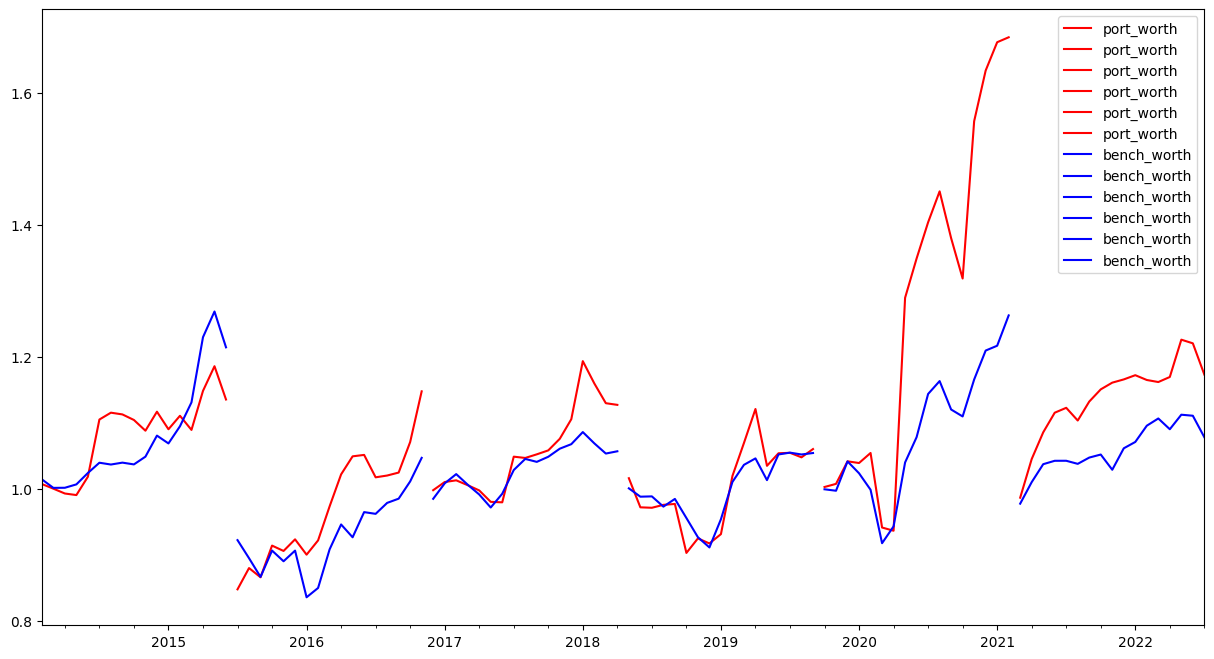

In [40]:
fig, ax = plt.subplots(figsize=(15,8))
for pw in port_ws:
    pw.columns = ['port_worth']
    pw.plot.line(ax=ax, color='r')
for bw in bench_ws:
    bw.columns = ['bench_worth']
    bw.plot(ax=ax, color='b')

ax.plot()

In [43]:
con_pws = evaluator.get_continue_worth(port_ws)
con_bws = evaluator.get_continue_worth(bench_ws)

[]

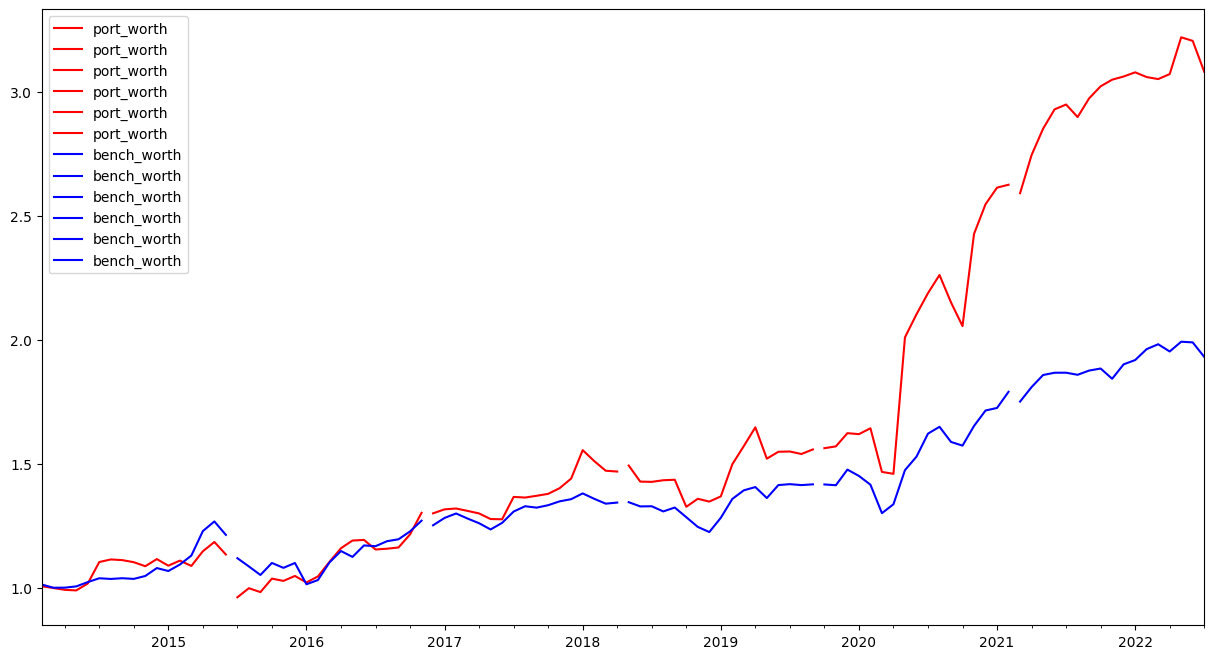

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
for pw in con_pws:
    pw.columns = ['port_worth']
    pw.plot.line(ax=ax, color='r')
for bw in con_bws:
    bw.columns = ['bench_worth']
    bw.plot(ax=ax, color='b')

ax.plot()